In [2]:
import pandas as pd
import numpy as np
from datasets import load_dataset

In [3]:
ds = load_dataset("gretelai/synthetic_text_to_sql")

README.md: 0.00B [00:00, ?B/s]

synthetic_text_to_sql_train.snappy.parqu(…):   0%|          | 0.00/32.4M [00:00<?, ?B/s]

synthetic_text_to_sql_test.snappy.parque(…):   0%|          | 0.00/1.90M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5851 [00:00<?, ? examples/s]

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'],
        num_rows: 100000
    })
    test: Dataset({
        features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'],
        num_rows: 5851
    })
})

In [5]:
test_df = pd.DataFrame(ds['test'])

In [6]:
test_df.head()

,id,domain,domain_description,sql_complexity,sql_complexity_description,sql_task_type,sql_task_type_description,sql_prompt,sql_context,sql,sql_explanation
0,1,artificial intelligence,"AI data on algorithmic fairness, AI safety, ex...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the average explainability score of cr...,"CREATE TABLE creative_ai (application_id INT, ...",SELECT AVG(explainability_score) FROM creative...,This SQL query calculates the average explaina...
1,2,rural development,"Agricultural innovation metrics, rural infrast...",basic SQL,basic SQL with a simple select statement,data manipulation,"inserting, updating, or deleting records",Delete all records of rural infrastructure pro...,"CREATE TABLE rural_infrastructure (id INT, pro...",DELETE FROM rural_infrastructure WHERE country...,This SQL query deletes all records of rural in...
2,3,aerospace,"Aircraft manufacturing data, satellite deploym...",aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,"generating reports, dashboards, and analytical...",How many accidents have been recorded for Spac...,"CREATE TABLE Accidents (id INT, launch_provide...","SELECT launch_provider, COUNT(*) FROM Accident...",This query groups the Accidents table by the l...
3,4,aquaculture,"Aquatic farming data, fish stock management, o...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the maximum quantity of seafood sold i...,"CREATE TABLE sales (id INT, location VARCHAR(2...",SELECT MAX(quantity) FROM sales;,Find the maximum quantity of seafood sold in a...
4,5,entertainment industry,"Audience demographics, viewership trends, cont...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the total budget for movies released b...,"CREATE TABLE Movies_Release_Year (id INT, titl...",SELECT SUM(budget) FROM Movies_Release_Year WH...,This query calculates the total budget for mov...


In [7]:
test_df['domain'].value_counts(normalize=True)

,proportion
domain,
rural development,0.014698
sports,0.014527
water resources,0.014527
oceanography,0.014186
public transportation,0.013331
...,...
cosmetics,0.005982
entertainment industry,0.005811
fine arts,0.005469


In [9]:
test_df[test_df['domain'] == 'insurance'].shape

(51, 11)

In [11]:
train_df = pd.DataFrame(ds['train'])

In [13]:
df = pd.concat([test_df[test_df['domain'] == 'insurance'], train_df[train_df['domain'] == 'insurance']], axis=0)

In [14]:
df.shape

(991, 11)

In [15]:
df.head()

,id,domain,domain_description,sql_complexity,sql_complexity_description,sql_task_type,sql_task_type_description,sql_prompt,sql_context,sql,sql_explanation
174,175,insurance,"Underwriting data, claims processing informati...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the average claim amount in the 'East'...,"CREATE TABLE Claims (ClaimID INT, PolicyID INT...",SELECT AVG(Amount) FROM Claims WHERE Region = ...,The SQL query calculates the average claim amo...
334,335,insurance,"Underwriting data, claims processing informati...",single join,"only one join (specify inner, outer, cross)",analytics and reporting,"generating reports, dashboards, and analytical...","List the policy numbers, claim amounts, and cl...",CREATE TABLE policies (policy_number INT);CREA...,"SELECT p.policy_number, c.claim_amount, c.clai...",The query starts by selecting the required col...
413,414,insurance,"Underwriting data, claims processing informati...",single join,"only one join (specify inner, outer, cross)",analytics and reporting,"generating reports, dashboards, and analytical...",Display policy_id and sum_insured for policies...,"CREATE TABLE policy_info (policy_id INT, premi...","SELECT policy_info.policy_id, policy_info.sum_...",This query returns policy_id and sum_insured c...
701,702,insurance,"Underwriting data, claims processing informati...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the average policy duration for policy...,"CREATE TABLE Policyholders (PolicyID INT, Risk...",SELECT AVG(p.PolicyDuration) as AvgPolicyDurat...,This SQL query calculates the average policy d...
782,783,insurance,"Underwriting data, claims processing informati...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",Find the total number of policies issued by 'D...,"CREATE TABLE policies (id INT, policy_number T...",SELECT COUNT(*) FROM policies WHERE department...,The SQL query calculates the total number of p...


In [17]:
drop_cols = ['domain', 'domain_description', 'sql_task_type_description', 'id', 'sql_context']
df.drop(drop_cols, axis=1, inplace=True)

In [18]:
df.head()

,sql_complexity,sql_complexity_description,sql_task_type,sql_prompt,sql,sql_explanation
174,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the average claim amount in the 'East'...,SELECT AVG(Amount) FROM Claims WHERE Region = ...,The SQL query calculates the average claim amo...
334,single join,"only one join (specify inner, outer, cross)",analytics and reporting,"List the policy numbers, claim amounts, and cl...","SELECT p.policy_number, c.claim_amount, c.clai...",The query starts by selecting the required col...
413,single join,"only one join (specify inner, outer, cross)",analytics and reporting,Display policy_id and sum_insured for policies...,"SELECT policy_info.policy_id, policy_info.sum_...",This query returns policy_id and sum_insured c...
701,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the average policy duration for policy...,SELECT AVG(p.PolicyDuration) as AvgPolicyDurat...,This SQL query calculates the average policy d...
782,basic SQL,basic SQL with a simple select statement,analytics and reporting,Find the total number of policies issued by 'D...,SELECT COUNT(*) FROM policies WHERE department...,The SQL query calculates the total number of p...


In [19]:
!pip install mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.8/442.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 13.3 MB/s eta 0:00:00


In [24]:
!pip install git+https://github.com/toon-format/toon-python.git

  Cloning https://github.com/toon-format/toon-python.git to /tmp/pip-req-build-jq7aoe62
  Running command git clone --filter=blob:none --quiet https://github.com/toon-format/toon-python.git /tmp/pip-req-build-jq7aoe62
  Resolved https://github.com/toon-format/toon-python.git to commit 9c4f0c0c24f2a0b0b376315f4b8707f8c9006de6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for toon_format: filename=toon_format-0.9.0b1-py3-none-any.whl size=36285 sha256=298ea641dec9bbf68d69226a6cd31b4cb504fe79b43bc82a1675c5be86b814bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-36sskm7d/wheels/71/5b/77/bc062fea7c190909f65ce491c147046ee0face81c520fba311
Successfully built toon_format


In [26]:
from mistralai import Mistral
from toon_format import encode

In [69]:
mistral_key = "GgIFpi6FsIxmBKHeBNOP57zMOQUx7oO2"

In [22]:
metadata = {
  "tables": [
    {
        "table_name": "customers",
        "columns":{
    "customer_id": "Unique identifier for each customer, format 'CUST_' followed by 6-digit number (string)",
    "name": "Full name of the customer (string)",
    "phone": "Phone number of the customer (string)",
    "city": "City where the customer resides (string, categorical examples: ['Minneapolis', 'New York', 'Chicago', 'Dallas', 'San Jose', 'Miami', 'Seattle'])",
    "state": "State where the customer resides (string, categorical examples: ['Minnesota', 'New York', 'Illinois', 'Texas', 'California', 'Florida', 'Washington'])",
    "zipcode": "ZIP code of the customer's location (string, categorical examples: ['55414', '10001', '60601', '75201', '95101', '33101', '98101'])",
    "age": "Age of the customer in years (integer, 20–75)",
    "gender": "Gender of the customer, categorical, values: ['male', 'female', 'nonbinary']",
    "marital_status": "Marital status, categorical, values: ['single', 'married', 'divorced', 'widowed']",
    "dependents": "Number of dependents (integer)",
    "education_level": "Highest education level, categorical, values: ['high_school', 'bachelor', 'master', 'phd']",
    "occupation": "Occupation of the customer (string, categorical, examples depend on age group)",
    "employment_status": "Employment status, categorical, values: ['employed', 'self-employed', 'unemployed', 'retired', 'student']",
    "annual_income": "Annual income in USD (integer)",
    "credit_score": "Credit score of the customer (integer, 550–850)",
    "existing_loans": "Type of existing loans, categorical, values: ['none', 'home', 'car', 'personal', 'multiple']",
    "avg_monthly_expense": "Average monthly expense in USD (float)",
    "vehicle_owner": "Whether the customer owns a vehicle (boolean, True/False)",
    "vehicle_type": "Type of vehicle owned, categorical, values: ['car', 'bike', 'none']",
    "budget_per_month": "Monthly budget allocated for insurance/expenses in USD (integer)",
    "customer_tenure_years": "Customer tenure in years (float, 0.5–10)",
    "coverage_preferences": "Preferred types of insurance coverage, list of 1–2 items, categorical, values: ['health', 'life', 'auto', 'home']",
    "risk_tolerance": "Risk tolerance level, categorical, values: ['Low', 'Medium', 'High']",
    "interest_tags": "List of interest tags related to lifestyle or insurance needs, examples: ['family', 'education', 'vehicle', 'retirement', 'travel', 'maternity']"
          }
    },
    {
        "table_name": "policies",
        "columns": {
    "policy_id": "Unique identifier for each policy, format 'POL_' followed by 6-digit number (string)",
    "customer_id": "Identifier for the customer who owns the policy (string, foreign key to customers table)",
    "policy_type": "Type of insurance policy, categorical, values: ['health', 'life', 'auto', 'home']",
    "premium_amount": "Premium amount charged for the policy in USD (integer)",
    "coverage_amount": "Coverage amount provided by the policy in USD (integer)",
    "policy_duration_years": "Duration of the policy in years (integer)",
    "policy_start_year": "Start year of the policy (integer, e.g., 2015–2024)",
    "policy_end_year": "End year of the policy (integer)",
    "policy_risk_level": "Risk level assigned to the policy, categorical, values: ['low', 'medium', 'high']",
    "policy_status": "Current status of the policy, categorical, values: ['active', 'inactive']"
        }
    },
    {
        "table_name": "submissions",
        "columns":{
    "submission_id": "Unique identifier for each submission, format 'SUB-' followed by 6-character alphanumeric code (string)",
    "submission_date": "Date when the submission was created (YYYY-MM-DD, string)",
    "policy_type": "Type of insurance policy, categorical, values: ['health', 'life', 'auto', 'home']",
    "statusid": "Submission status code, categorical, values: ['BND' (Bound), 'QTE' (Quote Only), 'DEC' (Declined), 'UNQ' (Unquoted)]",
    "assignment_date": "Date when submission was assigned to an agent (YYYY-MM-DD, string, may be empty)",
    "first_contact": "Date of first contact with customer (YYYY-MM-DD, string, may be empty)",
    "quote_date": "Date when quote was provided (YYYY-MM-DD, string, may be empty)",
    "declined_date": "Date when submission was declined (YYYY-MM-DD, string, may be empty)",
    "contacted": "Indicates if customer was contacted, categorical, values: ['Yes', 'No']",
    "overwritten_flag": "Indicates if submission was overwritten, categorical, values: ['Yes', 'No']",
    "reclassification_flag": "Indicates if submission was reclassified, categorical, values: ['Yes', 'No']",
    "additional_info_requested": "Indicates if additional info was requested, categorical, values: ['Yes', 'No']",
    "agent_id": "Identifier for the agent assigned to this submission (string, foreign key to agents table)",
    "policy_id": "Identifier for the policy bound to this submission, if applicable (string, foreign key to policies table, may be empty)"
}
    },

    {
       "table_name": "claims",
       "columns":{
    "claim_id": "Unique identifier for each claim, format 'CLM_' followed by 6-digit number (string)",
    "policy_id": "Identifier for the policy associated with the claim (string, foreign key to policies table)",
    "customer_id": "Identifier for the customer making the claim (string, foreign key to customers table)",
    "claim_date": "Date when the claim was made (YYYY-MM-DD, string)",
    "claim_amount": "Total claimed amount in USD (float)",
    "approved_amount": "Amount approved for payout; 0 if rejected (float)",
    "claim_status": "Status of the claim, categorical, values: ['approved', 'rejected']",
    "processing_time_days": "Number of days taken to process the claim (integer)",
    "settlement_date": "Date when the claim was settled; None if rejected (YYYY-MM-DD, string or null)",
    "fraud_flag": "Indicates potential fraud, binary, values: [0, 1]"
}
    },

  {
    "table_name": "agents",
    "columns":{
    "agent_id": "Unique identifier for each agent, format 'A' followed by a number (e.g., A1000), categorical",
    "agent_name": "Full name of the agent (string)",
    "agent_license_number": "Unique license number for the agent, format 'LIC-' followed by 8-character alphanumeric code (string)",
    "agency_name": "Name of the agency the agent belongs to (string)",
    "channel": "The sales channel the agent operates in, categorical, values: ['Telemarketing', 'Digital', 'Branch']",
    "policy_type": "Line of business the agent handles, categorical, values: ['auto', 'home', 'health', 'life']"
    }
  }
]
}

In [23]:
new_metadata = dict()
for i in metadata['tables']:
  new_metadata[i['table_name']] = dict()
  # new_metadata[i['table_name']]['description'] = i['description']
  new_metadata[i['table_name']]['columns'] = i['columns']

In [27]:
metadata_toon = ''
for i in new_metadata:
  metadata_toon += f'Table: {i}\n'
  metadata_toon += encode(new_metadata[i])
  metadata_toon += '\n\n'

In [28]:
df.head()

,sql_complexity,sql_complexity_description,sql_task_type,sql_prompt,sql,sql_explanation
174,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the average claim amount in the 'East'...,SELECT AVG(Amount) FROM Claims WHERE Region = ...,The SQL query calculates the average claim amo...
334,single join,"only one join (specify inner, outer, cross)",analytics and reporting,"List the policy numbers, claim amounts, and cl...","SELECT p.policy_number, c.claim_amount, c.clai...",The query starts by selecting the required col...
413,single join,"only one join (specify inner, outer, cross)",analytics and reporting,Display policy_id and sum_insured for policies...,"SELECT policy_info.policy_id, policy_info.sum_...",This query returns policy_id and sum_insured c...
701,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the average policy duration for policy...,SELECT AVG(p.PolicyDuration) as AvgPolicyDurat...,This SQL query calculates the average policy d...
782,basic SQL,basic SQL with a simple select statement,analytics and reporting,Find the total number of policies issued by 'D...,SELECT COUNT(*) FROM policies WHERE department...,The SQL query calculates the total number of p...


In [36]:
df.reset_index(drop=True, inplace=True)

In [29]:
def use_mistral(prompt, model="mistral-large-2411", op_type="json_object"):

  with Mistral(
    api_key=mistral_key,
) as mistral:

    res = mistral.chat.complete(model=model, messages=[
        {
            "content": prompt,
            "role": "user",
        },
    ], response_format= { "type": op_type }, stream=False)

    return res.choices[0].message.content

In [38]:
from tqdm import tqdm

In [46]:
sample_df = df.sample(50)
outputs = []

for i in tqdm(sample_df.index):
  curr_df = df.iloc[i]
  sql = curr_df['sql']

  prompt = f"""You are an Insurance Data Analyst who works with assessing if the query can be run on the given database or not.
You will be given a schema of an insurance database and an SQL query, your job is to tell of that query can be run without an error on the given database

If it cannot be run modify the SQL query and give a query which is similar to the query given to you but can be run on the given database.

Output format:
{{
  can_run: 1 if it can be run, 0 if it cannot be run
  explanation: why it cannot be run
  runnable_query: the query which can be run on the given database
}}

Your output should be in JSON format and NO OTHER TEXT SHOULD BE THERE.

Schema of the DB:

{metadata_toon}

SQL Query:
{sql}
"""
  output = eval(use_mistral(prompt))
  outputs.append(output)




100%|██████████| 50/50 [02:15<00:00,  2.70s/it]


In [47]:
outputs

[{'can_run': 0,
  'explanation': "The columns 'policy_number', 'coverage_start_date', and 'region' do not exist in the 'policies' table. Additionally, the 'agents' table does not have a 'name' column; it should be 'agent_name'.",
  'runnable_query': "SELECT policies.policy_id, policies.policy_start_year, agents.agent_name FROM policies INNER JOIN agents ON policies.agent_id = agents.agent_id WHERE customers.state = 'California';"},
 {'can_run': 0,
  'explanation': "Table 'Policyholders' does not exist. Column 'FirstYear' does not exist. Column 'Country' does not exist.",
  'runnable_query': "SELECT COUNT(*) * 100.0 / SUM(CASE WHEN policy_start_year = '2023' THEN 1 ELSE 0 END) AS PolicyRetentionRate FROM policies WHERE 1=1;"},
 {'can_run': 0,
  'explanation': "The table 'policyholders' does not exist in the given schema. Additionally, the 'customers' table does not have a 'policy_type' column.",
  'runnable_query': "SELECT MIN(age) FROM customers WHERE state = 'FL';"},
 {'can_run': 0,
 

In [48]:
new_query, can_run = [], []

for i in outputs:
  new_query.append(i['runnable_query'])
  can_run.append(i['can_run'])

sample_df['new_query'] = new_query
sample_df['can_run'] = can_run

In [50]:
sample_df

,sql_complexity,sql_complexity_description,sql_task_type,sql_prompt,sql,sql_explanation,new_query,can_run
773,single join,"only one join (specify inner, outer, cross)",analytics and reporting,"What is the policy number, coverage start date...","SELECT policies.policy_number, policies.covera...",Join the policies table with the agents table ...,"SELECT policies.policy_id, policies.policy_sta...",0
695,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the policy retention rate for policyho...,SELECT COUNT(*) * 100.0 / SUM(CASE WHEN FirstY...,This query calculates the policy retention rat...,SELECT COUNT(*) * 100.0 / SUM(CASE WHEN policy...,0
494,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the minimum age for health insurance p...,SELECT MIN(age) FROM policyholders WHERE state...,This query finds the minimum age for health in...,SELECT MIN(age) FROM customers WHERE state = '...,0
988,single join,"only one join (specify inner, outer, cross)",analytics and reporting,What is the minimum claim amount for policyhol...,SELECT MIN(claim_amount) FROM claims JOIN poli...,We are finding the minimum claim amount for po...,SELECT MIN(claim_amount) FROM claims JOIN cust...,0
385,aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,What is the average claim amount for policyhol...,"SELECT PolicyType, AVG(ClaimAmount) AS AvgClai...",This query calculates the average claim amount...,"SELECT policy_type, AVG(claim_amount) AS AvgCl...",0
235,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the total premium collected from polic...,SELECT SUM(premium) FROM policyholders WHERE s...,The SQL query calculates the total premium col...,SELECT SUM(premium_amount) FROM policies WHERE...,0
528,single join,"only one join (specify inner, outer, cross)",analytics and reporting,What is the average claim amount for policyhol...,SELECT AVG(claim_amount) FROM claims c JOIN po...,The SQL query joins the 'claims' table with th...,SELECT AVG(claim_amount) FROM claims c JOIN cu...,0
813,set operations,"set operations such as UNION, INTERSECT, and E...",analytics and reporting,What are the names and birthdates of policyhol...,"SELECT Name, Birthdate FROM Policyholder WHERE...","First, we select the Name and Birthdate column...",SELECT name FROM customers WHERE 'auto' = ANY(...,0
521,multiple_joins,"two or more joins (specify inner, outer, cross)",analytics and reporting,What are the names and policy numbers of polic...,"SELECT p.PolicyholderName, p.PolicyNumber FROM...",These queries join the Policyholders and Claim...,"SELECT c.customer_id, p.policy_id FROM custome...",0
87,subqueries,"subqueries, including correlated and nested su...",analytics and reporting,"What is the policy number, policy type, and co...","SELECT policy_number, policy_type, coverage_am...","The SQL query selects the policy number, polic...","SELECT policy_id, policy_type, coverage_amount...",0


In [61]:
outputs = []

for _,i in tqdm(sample_df.iterrows()):
  # curr_df = sample_df.iloc[i]
  sql = i['new_query']
  nl = i['sql_prompt']

  prompt = f"""You are an Insurance Data Analyst who gives a possible natural language query for the given SQL query.
You will be given an SQL query and an NL query.
Your job is to read the NL query first and give a precise natural language query that the given SQL query answers. The output NL query should be similar to the given.

Output format:
{{
  nl_query: the natural language query
}}

Your output should be in JSON format and NO OTHER TEXT SHOULD BE THERE.

NL Query:
{nl}

SQL Query:
{sql}
"""
  output = eval(use_mistral(prompt))
  outputs.append(output)




50it [01:03,  1.28s/it]


In [56]:
outputs.append({'nl_query': 'NaN'})

In [62]:
nl_query = []
for i in outputs:
  nl_query.append(i['nl_query'])

sample_df['nl_query'] = nl_query

In [63]:
sample_df

,sql_complexity,sql_complexity_description,sql_task_type,sql_prompt,sql,sql_explanation,new_query,can_run,nl_query
773,single join,"only one join (specify inner, outer, cross)",analytics and reporting,"What is the policy number, coverage start date...","SELECT policies.policy_number, policies.covera...",Join the policies table with the agents table ...,"SELECT policies.policy_id, policies.policy_sta...",0,"What is the policy number, coverage start date..."
695,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the policy retention rate for policyho...,SELECT COUNT(*) * 100.0 / SUM(CASE WHEN FirstY...,This query calculates the policy retention rat...,SELECT COUNT(*) * 100.0 / SUM(CASE WHEN policy...,0,"What is the overall policy retention rate, cal..."
494,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the minimum age for health insurance p...,SELECT MIN(age) FROM policyholders WHERE state...,This query finds the minimum age for health in...,SELECT MIN(age) FROM customers WHERE state = '...,0,What is the minimum age for customers in Florida?
988,single join,"only one join (specify inner, outer, cross)",analytics and reporting,What is the minimum claim amount for policyhol...,SELECT MIN(claim_amount) FROM claims JOIN poli...,We are finding the minimum claim amount for po...,SELECT MIN(claim_amount) FROM claims JOIN cust...,0,What is the minimum claim amount from the clai...
385,aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,What is the average claim amount for policyhol...,"SELECT PolicyType, AVG(ClaimAmount) AS AvgClai...",This query calculates the average claim amount...,"SELECT policy_type, AVG(claim_amount) AS AvgCl...",0,What is the average claim amount partitioned b...
235,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the total premium collected from polic...,SELECT SUM(premium) FROM policyholders WHERE s...,The SQL query calculates the total premium col...,SELECT SUM(premium_amount) FROM policies WHERE...,0,What is the total premium amount collected fro...
528,single join,"only one join (specify inner, outer, cross)",analytics and reporting,What is the average claim amount for policyhol...,SELECT AVG(claim_amount) FROM claims c JOIN po...,The SQL query joins the 'claims' table with th...,SELECT AVG(claim_amount) FROM claims c JOIN cu...,0,What is the average claim amount for customers...
813,set operations,"set operations such as UNION, INTERSECT, and E...",analytics and reporting,What are the names and birthdates of policyhol...,"SELECT Name, Birthdate FROM Policyholder WHERE...","First, we select the Name and Birthdate column...",SELECT name FROM customers WHERE 'auto' = ANY(...,0,What are the names of policyholders who have a...
521,multiple_joins,"two or more joins (specify inner, outer, cross)",analytics and reporting,What are the names and policy numbers of polic...,"SELECT p.PolicyholderName, p.PolicyNumber FROM...",These queries join the Policyholders and Claim...,"SELECT c.customer_id, p.policy_id FROM custome...",0,"Which customers do not have a policy, and what..."
87,subqueries,"subqueries, including correlated and nested su...",analytics and reporting,"What is the policy number, policy type, and co...","SELECT policy_number, policy_type, coverage_am...","The SQL query selects the policy number, polic...","SELECT policy_id, policy_type, coverage_amount...",0,"What are the policy number, type of policy, an..."


In [64]:
for i in sample_df.iterrows():
  print(i[1]['nl_query'])
  print(i[1]['sql_prompt'])
  print()

What is the policy number, coverage start date, and agent name for all policies where the customer is from the 'California' region?
What is the policy number, coverage start date, and name of the agent for all policies in the 'California' region?

What is the overall policy retention rate, calculated as the percentage of policyholders who renewed their policies after the first year?
What is the policy retention rate for policyholders from Japan, calculated as the percentage of policyholders who renewed their policies after the first year?

What is the minimum age for customers in Florida?
What is the minimum age for health insurance policyholders in Florida?

What is the minimum claim amount from the claims of the customers in Arizona?
What is the minimum claim amount for policyholders in Arizona?

What is the average claim amount partitioned by policy type?
What is the average claim amount for policyholders from India, partitioned by policy type?

What is the total premium amount coll

In [65]:
sample_df.to_csv('eval_df.csv', index=False)

In [66]:
eval_df = pd.read_csv('eval_df_output.csv')

In [67]:
eval_df.head()

,sql_complexity,sql_complexity_description,sql_task_type,sql_prompt,sql,sql_explanation,new_query,can_run,nl_query,sql_query
0,single join,"only one join (specify inner, outer, cross)",analytics and reporting,"What is the policy number, coverage start date...","SELECT policies.policy_number, policies.covera...",Join the policies table with the agents table ...,"SELECT policies.policy_id, policies.policy_sta...",0,"What is the policy number, coverage start date...",NaN
1,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the policy retention rate for policyho...,SELECT COUNT(*) * 100.0 / SUM(CASE WHEN FirstY...,This query calculates the policy retention rat...,SELECT COUNT(*) * 100.0 / SUM(CASE WHEN policy...,0,"What is the overall policy retention rate, cal...",NaN
2,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the minimum age for health insurance p...,SELECT MIN(age) FROM policyholders WHERE state...,This query finds the minimum age for health in...,SELECT MIN(age) FROM customers WHERE state = '...,0,What is the minimum age for customers in Florida?,select min(age) from customers where state = '...
3,single join,"only one join (specify inner, outer, cross)",analytics and reporting,What is the minimum claim amount for policyhol...,SELECT MIN(claim_amount) FROM claims JOIN poli...,We are finding the minimum claim amount for po...,SELECT MIN(claim_amount) FROM claims JOIN cust...,0,What is the minimum claim amount from the clai...,select min(c.claim_amount) from claims c join ...
4,aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,What is the average claim amount for policyhol...,"SELECT PolicyType, AVG(ClaimAmount) AS AvgClai...",This query calculates the average claim amount...,"SELECT policy_type, AVG(claim_amount) AS AvgCl...",0,What is the average claim amount partitioned b...,"SELECT policy_type, AVG(claim_amount) FROM cla..."


In [70]:
outputs = []

for i in tqdm(eval_df.iterrows()):
  nl = i[1]['nl_query']
  gt = i[1]['new_query']
  generated = i[1]['sql_query']
  # print()

  eval_prompt = f"""You are an SQL query evaluator, who evaluates if the SQL query given is correct.
You'll be given a natural language query and the generated SQL query and an original SQL query which are answers to the natural language query.

Give Yes if the generated query answers the natural language query or if it is logically same as the original query.
Give No if the generated query does not answer the natural language query

Your output should be in JSON format and NO OTHER TEXT SHOULD BE THERE.

Output format:
{{
  is_correct: Yes/No
}}

Natural Language Query:
{nl}

Generated SQL Query:
{generated}

Original SQL Query:
{gt}
"""
  output = eval(use_mistral(eval_prompt))
  outputs.append(output)


50it [00:41,  1.19it/s]


In [71]:
eval_df['is_correct'] = [i['is_correct'] for i in outputs]

In [72]:
eval_df

,sql_complexity,sql_complexity_description,sql_task_type,sql_prompt,sql,sql_explanation,new_query,can_run,nl_query,sql_query,is_correct
0,single join,"only one join (specify inner, outer, cross)",analytics and reporting,"What is the policy number, coverage start date...","SELECT policies.policy_number, policies.covera...",Join the policies table with the agents table ...,"SELECT policies.policy_id, policies.policy_sta...",0,"What is the policy number, coverage start date...",NaN,No
1,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the policy retention rate for policyho...,SELECT COUNT(*) * 100.0 / SUM(CASE WHEN FirstY...,This query calculates the policy retention rat...,SELECT COUNT(*) * 100.0 / SUM(CASE WHEN policy...,0,"What is the overall policy retention rate, cal...",NaN,No
2,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the minimum age for health insurance p...,SELECT MIN(age) FROM policyholders WHERE state...,This query finds the minimum age for health in...,SELECT MIN(age) FROM customers WHERE state = '...,0,What is the minimum age for customers in Florida?,select min(age) from customers where state = '...,Yes
3,single join,"only one join (specify inner, outer, cross)",analytics and reporting,What is the minimum claim amount for policyhol...,SELECT MIN(claim_amount) FROM claims JOIN poli...,We are finding the minimum claim amount for po...,SELECT MIN(claim_amount) FROM claims JOIN cust...,0,What is the minimum claim amount from the clai...,select min(c.claim_amount) from claims c join ...,Yes
4,aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,What is the average claim amount for policyhol...,"SELECT PolicyType, AVG(ClaimAmount) AS AvgClai...",This query calculates the average claim amount...,"SELECT policy_type, AVG(claim_amount) AS AvgCl...",0,What is the average claim amount partitioned b...,"SELECT policy_type, AVG(claim_amount) FROM cla...",Yes
5,basic SQL,basic SQL with a simple select statement,analytics and reporting,What is the total premium collected from polic...,SELECT SUM(premium) FROM policyholders WHERE s...,The SQL query calculates the total premium col...,SELECT SUM(premium_amount) FROM policies WHERE...,0,What is the total premium amount collected fro...,SELECT SUM(p.premium_amount) FROM customers c ...,Yes
6,single join,"only one join (specify inner, outer, cross)",analytics and reporting,What is the average claim amount for policyhol...,SELECT AVG(claim_amount) FROM claims c JOIN po...,The SQL query joins the 'claims' table with th...,SELECT AVG(claim_amount) FROM claims c JOIN cu...,0,What is the average claim amount for customers...,select avg(c.claim_amount) from claims c join ...,Yes
7,set operations,"set operations such as UNION, INTERSECT, and E...",analytics and reporting,What are the names and birthdates of policyhol...,"SELECT Name, Birthdate FROM Policyholder WHERE...","First, we select the Name and Birthdate column...",SELECT name FROM customers WHERE 'auto' = ANY(...,0,What are the names of policyholders who have a...,select c.name from customers c join policies p...,Yes
8,multiple_joins,"two or more joins (specify inner, outer, cross)",analytics and reporting,What are the names and policy numbers of polic...,"SELECT p.PolicyholderName, p.PolicyNumber FROM...",These queries join the Policyholders and Claim...,"SELECT c.customer_id, p.policy_id FROM custome...",0,"Which customers do not have a policy, and what...","SELECT DISTINCT customers.*, COUNT(*) OVER() A...",Yes
9,subqueries,"subqueries, including correlated and nested su...",analytics and reporting,"What is the policy number, policy type, and co...","SELECT policy_number, policy_type, coverage_am...","The SQL query selects the policy number, polic...","SELECT policy_id, policy_type, coverage_amount...",0,"What are the policy number, type of policy, an...",NaN,No


In [73]:
eval_df['is_correct'].value_counts(normalize=True)

,proportion
is_correct,
Yes,0.56
No,0.44


In [83]:
type(eval_df['sql_query'].iloc[0])

float

In [86]:
no_nones = eval_df[eval_df['sql_query'] != float('nan')]

In [87]:
no_nones['is_correct'].value_counts(normalize=True)

,proportion
is_correct,
Yes,0.56
No,0.44


In [88]:
nan_idx = [0, 1, 9, 10, 16, 17, 20, 21, 24, 25, 26, 27, 28, 30, 35, 36, 37, 43]

In [89]:
no_nones = no_nones.drop(nan_idx)

In [90]:
no_nones.shape

(32, 11)

In [91]:
no_nones['is_correct'].value_counts(normalize=True)

,proportion
is_correct,
Yes,0.875
No,0.125


In [94]:
no_nones['flag'] = no_nones['is_correct'].apply(lambda x: 1 if x == 'Yes' else 0)

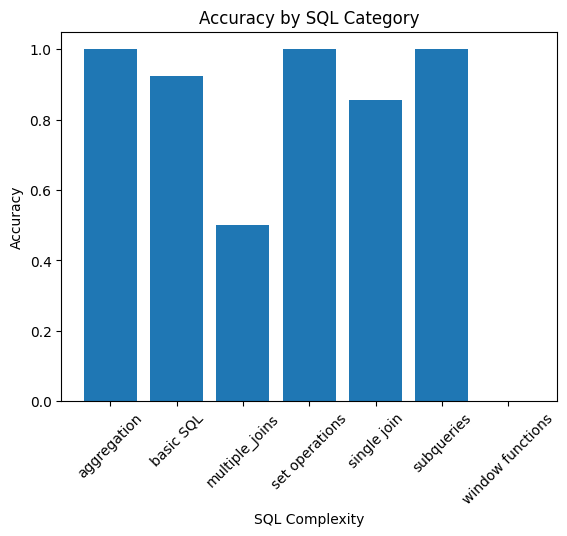

In [95]:
import matplotlib.pyplot as plt

acc = no_nones.groupby("sql_complexity")["flag"].mean()

plt.figure()
plt.bar(acc.index.astype(str), acc.values)
plt.xlabel("SQL Complexity")
plt.ylabel("Accuracy")
plt.title("Accuracy by SQL Category")
plt.xticks(rotation=45)
plt.show()


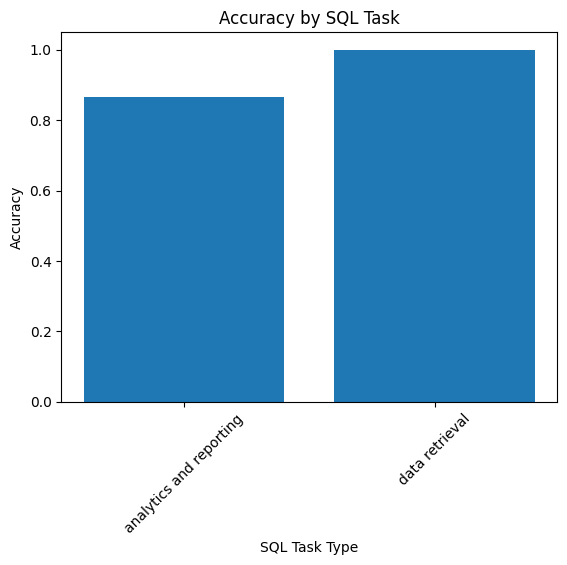

In [96]:
import matplotlib.pyplot as plt

acc = no_nones.groupby("sql_task_type")["flag"].mean()

plt.figure()
plt.bar(acc.index.astype(str), acc.values)
plt.xlabel("SQL Task Type")
plt.ylabel("Accuracy")
plt.title("Accuracy by SQL Task")
plt.xticks(rotation=45)
plt.show()


$s_0​=f_{gen}​(q,K(q,S),S)$

$s_{t+1}=f_{ref}(q,s_{t},E_{syn}(s_{t}),E_{log}(s_{t});$
$t= 0, 1, \ldots, N $

---

$f_{gen}(*)$ - Generation Step

$q$ - NL Query

$s_t$ - Generated SQL query at $t$

$K(q,S)$ - generated guidance (relevant tables, columns, steps)

$S$ - Schema

$f_{ref}(*)$ - Refinement Step

$E_{syn}(s_{t})$ - syntax error reflection at $t$

$E_{log}(s_{t})$ - logical error reflection at $t$


$N$ - max iterations

